In [131]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
import cv2
from tensorflow import keras
from keras import layers, Input
from keras.models import Sequential, Model
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


IMG_HEIGHT=200
IMG_WIDTH=200


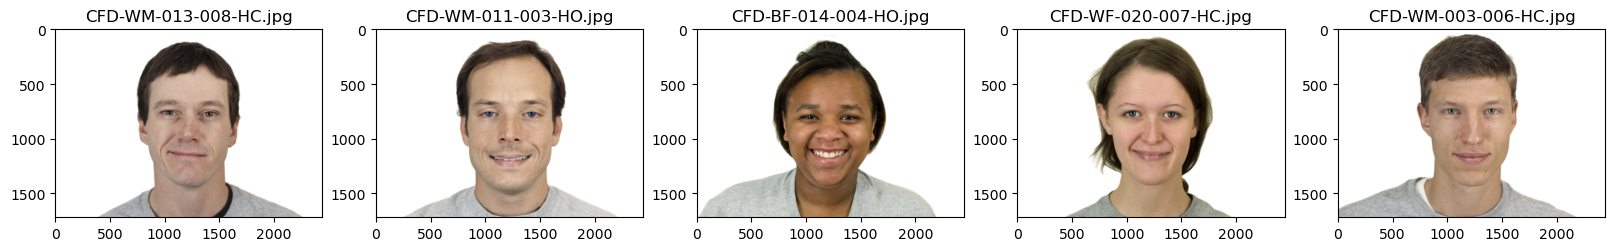

In [132]:
import random


plt.figure(figsize=(20,20))

hap_folder=r'C:\Users\arwen\OneDrive\Desktop\Face Base\Happy'
for i in range(5):
    file = random.choice(os.listdir(hap_folder))
    image_path= os.path.join(hap_folder, file)
    img=mpimg.imread(image_path)
    
    ax=plt.subplot(1,5,i+1)
    ax.set_title(file)
    plt.imshow(img)
    
    

In [133]:
def create_dataset(img_folder):
    image_array=[]
    name=[]
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):

            image_path= os.path.join(img_folder, dir1, file)
            image= cv2.imread(image_path, cv2.COLOR_BGR2RGB)
            image= cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH), interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image= image.astype('float32')
            image /= 255
            image_array.append(image)
            name.append(dir1)
            
    return (image_array, name)


(img_array, name) = create_dataset(r'C:\Users\arwen\OneDrive\Desktop\Face Base')


In [134]:
folder=r'C:\Users\arwen\OneDrive\Desktop\Face Base'


dictionary={k: v for v, k in enumerate(np.unique(name))}
dictionary 
{'Angry': 0, 'Happy': 1, 'Neutral': 2, 'Sad': 3, 'Surprised': 4}

target_value= [dictionary[name[i]] for i in range (len(name))]



    




In [135]:



model=tf.keras.Sequential(
    [
        tf.keras.layers.InputLayer(input_shape=
        (IMG_HEIGHT, IMG_WIDTH, 3)), 
        tf.keras.layers.Conv2D(filters=32, kernel_size=3,
        strides=(2, 2), activation='relu'),
        tf.keras.layers.Conv2D(filters=64, kernel_size=3, 
        strides=(2, 2), activation='relu'), 
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(6, activation='sigmoid')
    ]
)


model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

#training the model
history = model.fit(x=np.array(img_array, np.float32), 
y=tf.cast(list(map(int, target_value)), np.float32), batch_size=32,  epochs=5)

Epoch 1/5
40/40 [==============================] - 6s 137ms/step - loss: 1.7300 - accuracy: 0.4499
Epoch 2/5
40/40 [==============================] - 5s 134ms/step - loss: 1.1860 - accuracy: 0.4980
Epoch 3/5
40/40 [==============================] - 5s 131ms/step - loss: 1.0803 - accuracy: 0.5983
Epoch 4/5
40/40 [==============================] - 5s 127ms/step - loss: 0.9166 - accuracy: 0.6843
Epoch 5/5
40/40 [==============================] - 5s 131ms/step - loss: 0.6049 - accuracy: 0.7719


1/1 [==============================] - 0s 20ms/step
[[9.5751397e-02 9.4234690e-02 9.9645585e-01 2.6399209e-07 9.6161199e-01
  1.8282302e-10]]


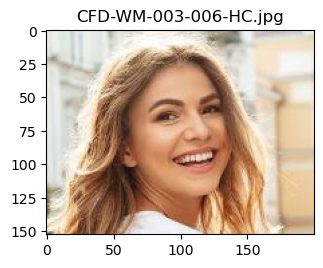

In [137]:
plt.figure(figsize=(20,20))

image_path=r'C:\Users\arwen\OneDrive\Desktop\What-Happy-Are-You.jpg'
image=mpimg.imread(image_path)
ax=plt.subplot(1,5,2)
ax.set_title(file)
plt.imshow(image)

image= cv2.imread(image_path, cv2.COLOR_BGR2RGB)
image= cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH), interpolation = cv2.INTER_AREA)
images_arr = []
images_arr.append(np.array(image))
img = np.asarray(images_arr)


img= img.astype('float32')
img /= 255

def find_emotion(prediction):
    emotion_list = ["Angry", "Happy", "Neutral", "Sad", "Surprised"]
    highest_val=prediction.argmax()
    emotion=emotion_list[highest_val]
    return emotion


prediction=model.predict(img)
print(prediction)


